In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt
import plotly
from skimage import io
from skimage import morphology as morp
import plotly.express as px
import plotly.graph_objects as go
import math

## Coins which are at the edge

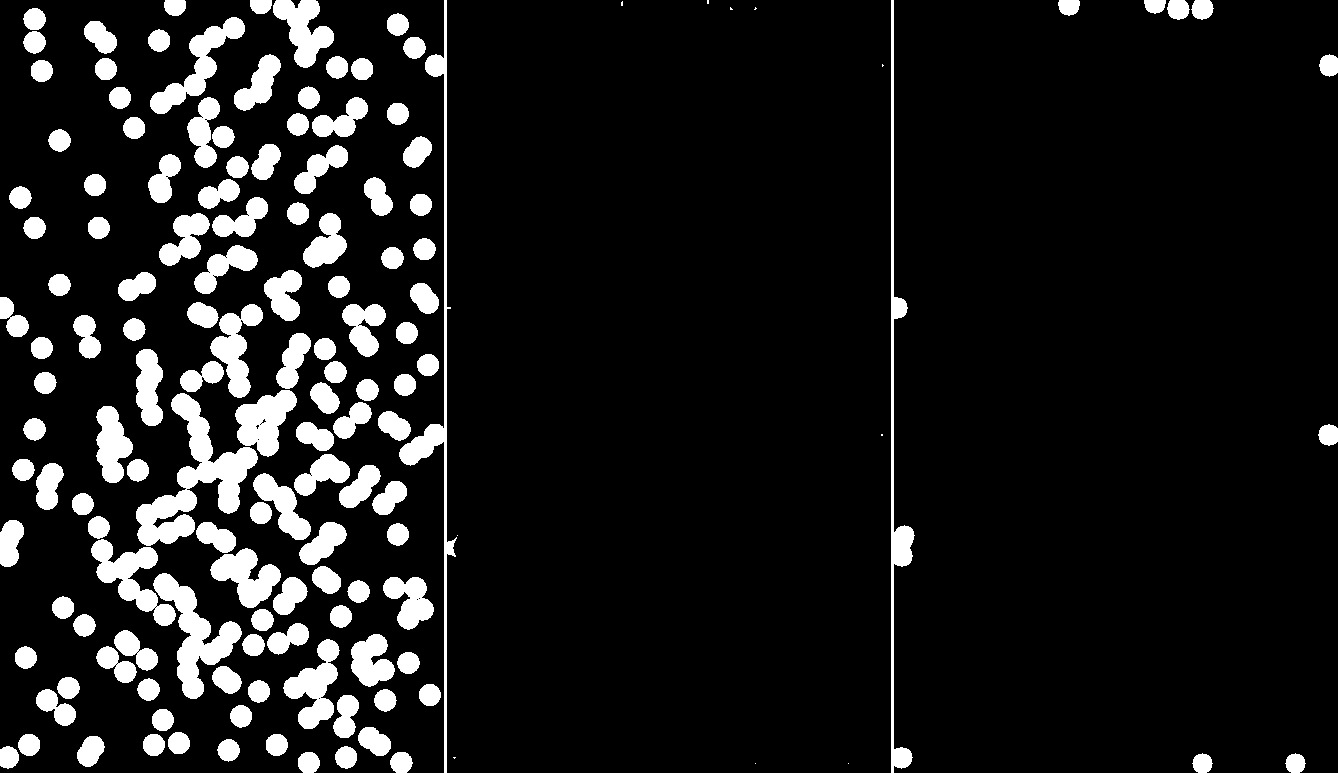

In [15]:
#coins are of radius about 9 pixels

coins = cv2.imread('/content/drive/My Drive/Image Processing/coins.jpg', cv2.IMREAD_GRAYSCALE)
coin_radius = 10

kernel = morp.disk(coin_radius)

ret,binary_inv = cv2.threshold(coins,125,255,cv2.THRESH_BINARY_INV)
ret,binary = cv2.threshold(coins,125,255,cv2.THRESH_BINARY)

e1 = cv2.erode(binary, kernel)

e1[coin_radius + 1: e1.shape[0] - coin_radius, coin_radius + 1: e1.shape[1] - coin_radius] = 0
#Boundary touching coins
e2 = cv2.dilate(e1, kernel)

padding = np.ones((e1.shape[0],3)) * 255
cv2_imshow(np.hstack([coins, padding, e1, padding, e2])

## Coins which do not overlap, only the coins which overlap

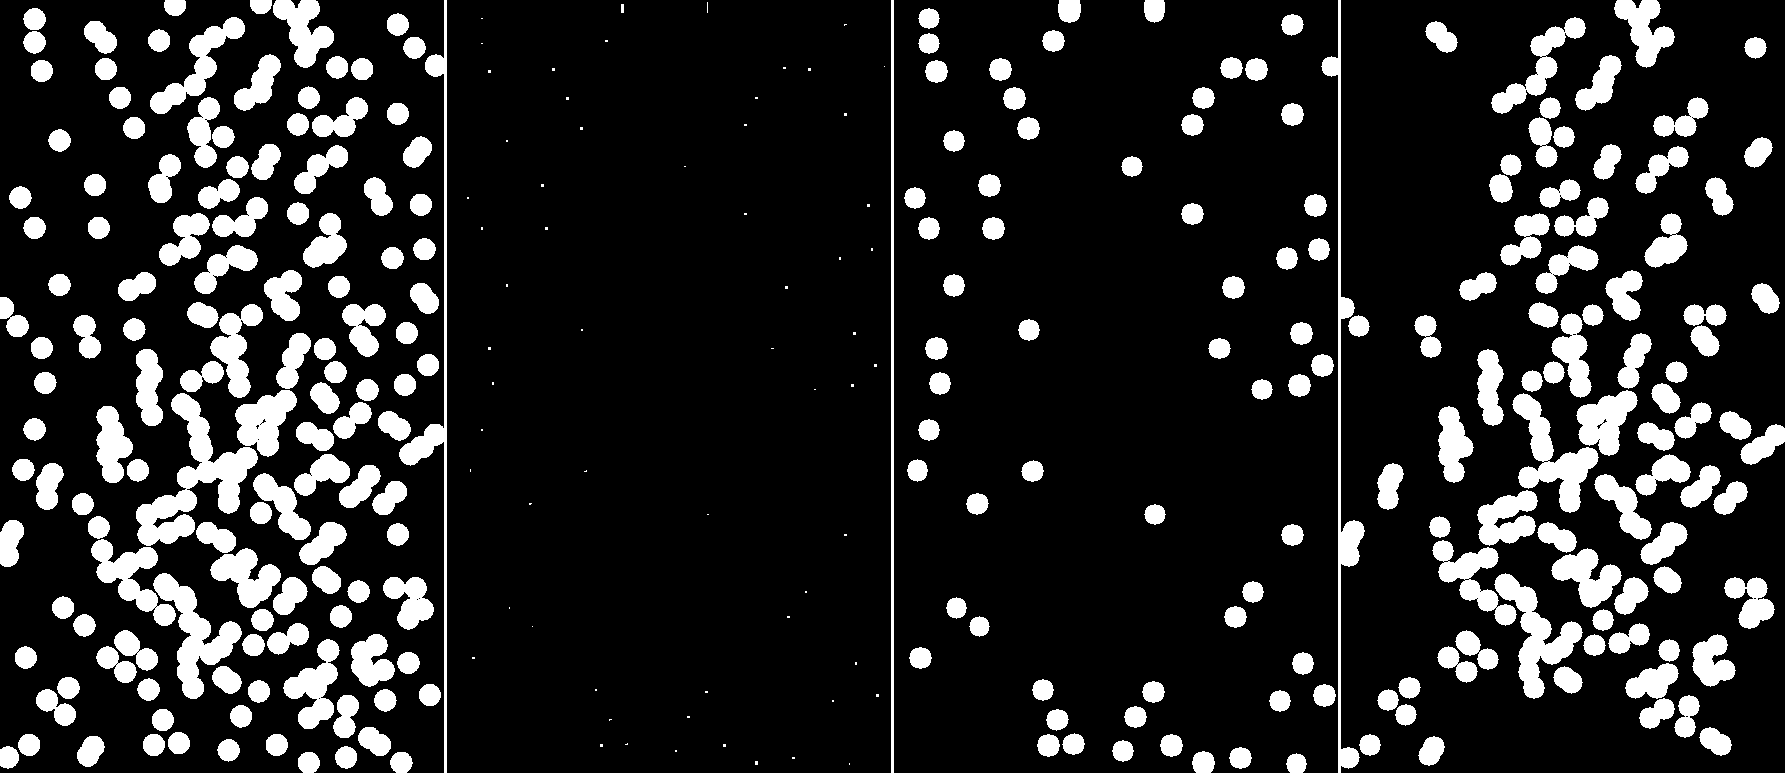

In [32]:
#coins are of radius about 9 pixels

coins = cv2.imread('/content/drive/My Drive/Image Processing/coins.jpg', cv2.IMREAD_GRAYSCALE)
coin_radius = 10

kernel = morp.disk(coin_radius)

ret,binary = cv2.threshold(coins,125,255,cv2.THRESH_BINARY)

sing_disk_kernel = np.zeros((26, 26)) #These dimensions seem to work well
sing_disk_kernel[0, :] = -1
sing_disk_kernel[-1, :] = -1
sing_disk_kernel[:, 0] = -1
sing_disk_kernel[:, -1] = -1
sing_disk_kernel[int(sing_disk_kernel.shape[0]/2), int(sing_disk_kernel.shape[1]/2)] = 1

e3 = cv2.morphologyEx(binary, cv2.MORPH_HITMISS, sing_disk_kernel, iterations = 1)
single_coins = cv2.dilate(e3,kernel)

#Erosion/dilution to close it out
overlap_coins = binary - single_coins
overlap_coins = cv2.erode(overlap_coins, kernel)
overlap_coins = cv2.dilate(overlap_coins, kernel)

cv2_imshow(np.hstack([binary, padding, e3, padding, single_coins, padding, overlap_coins]))

#HW: (Incomplete)
#Read the image 'objects.png' and try to answer the following questions using code.
Identify means plot the following objects.

How many objects have one or more holes?
How many square objects are in the image?
Identify the square objects that have holes.
Identify the circular objects that have no holes

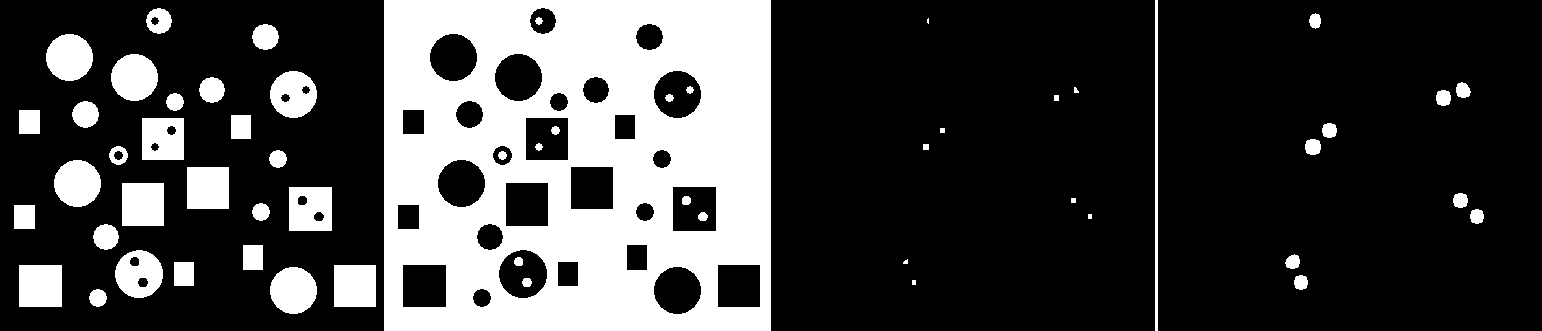

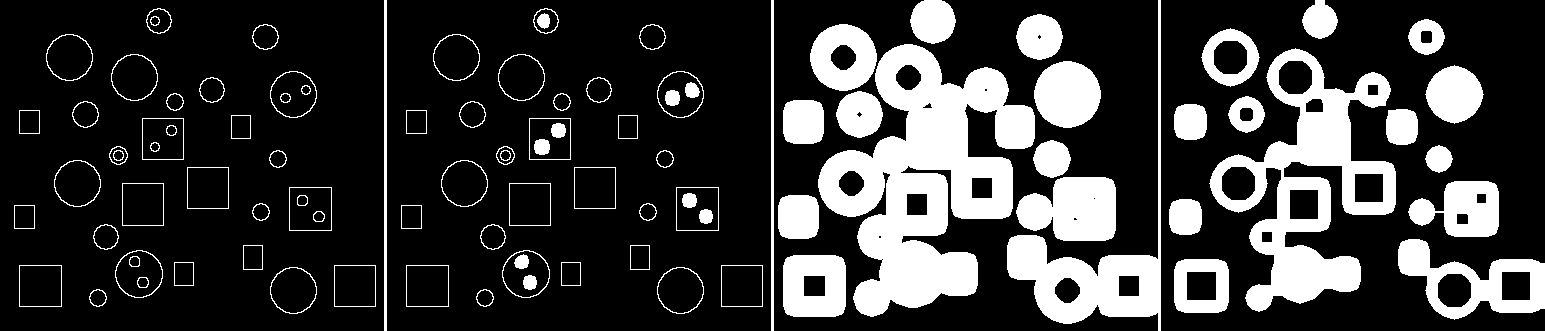

In [72]:
obj = cv2.imread('/content/drive/My Drive/Image Processing/objects.png', cv2.IMREAD_GRAYSCALE)
_, inv_obj = cv2.threshold(obj,125,255,cv2.THRESH_BINARY_INV)

kernel = np.zeros((15, 15)) #These dimensions seem to work well
kernel[0, :] = -1
kernel[-1, :] = -1
kernel[:, 0] = -1
kernel[:, -1] = -1
kernel[int(kernel.shape[0]/2), int(kernel.shape[1]/2)] = 1
# print(kernel)


# e3 = cv2.morphologyEx(obj, cv2.MORPH_HITMISS, kernel, iterations = 1)
# single_coins = cv2.dilate(e3,kernel)

hit_filter = cv2.morphologyEx(inv_obj, cv2.MORPH_HITMISS, kernel, iterations = 1)
holes = cv2.dilate(hit_filter, morp.disk(5))

padding = np.ones((obj.shape[0],3)) * 255

cv2_imshow(np.hstack([obj, inv_obj, padding, hit_filter, padding, holes]))

bounded_holes = obj - cv2.erode(obj, morp.square(3))
patchedup = bounded_holes + holes

#Cleaning edges / lines
filled = cv2.dilate(patchedup, morp.disk(5), iterations = 2)
cleaned = cv2.erode(filled, morp.square(5), iterations = 2)
print()
cv2_imshow(np.hstack([bounded_holes, padding, patchedup, padding, filled, padding, cleaned]))

#Chroma Keying

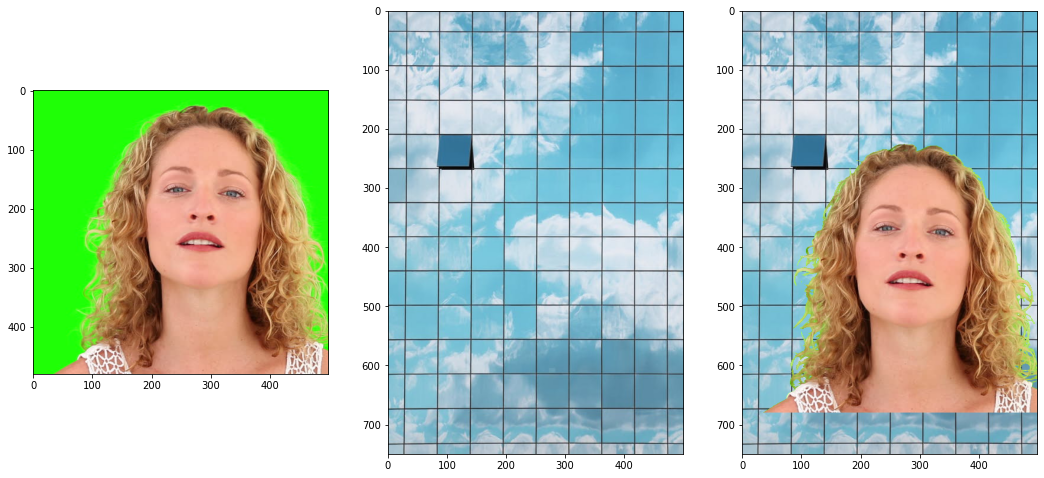

In [4]:
I1 = cv2.imread('/content/drive/My Drive/images/chroma_img.jpg')
I1 = cv2.cvtColor(I1, cv2.COLOR_BGR2RGB)

I1 = I1[:,200:700,:]
# print(I1.shape)
# cv2_imshow(I1)
I2 = cv2.imread('/content/drive/My Drive/Image Processing/window.jpeg')
I2 = cv2.cvtColor(I2, cv2.COLOR_BGR2RGB)
# print(I2.shape)
# cv2_imshow(I2)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = [18, 24])
ax1.imshow(I1)
ax2.imshow(I2)

x = 200
y = 0

for i in range(I1.shape[0]):
  for j in range(I1.shape[1]):
    t = I1[i, j] 
    if not (t[0] < 150 and t[2] < 150 and t[1] > 200):
      I2[x+i, y+j] = t

ax3.imshow(I2)
fig.show()

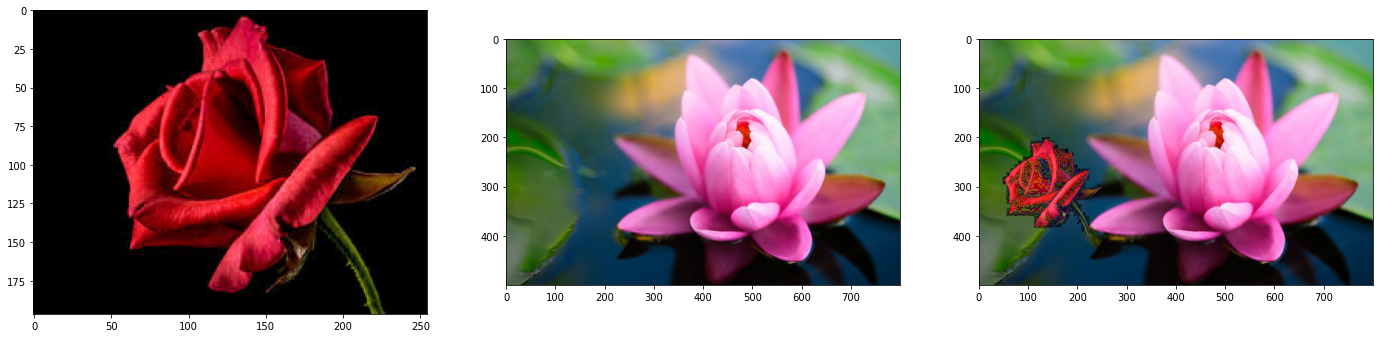

In [5]:
rose = cv2.cvtColor(cv2.imread('/content/drive/My Drive/Image Processing/rose.jpeg'), cv2.COLOR_BGR2RGB)
lotus = cv2.cvtColor(cv2.imread('/content/drive/My Drive/Image Processing/lotus.jpg'), cv2.COLOR_BGR2RGB)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = [24, 24])

# print(rose.shape)
height, width, _ = rose.shape
# cv2_imshow(rose)
# print(lotus.shape)
# cv2_imshow(lotus)

ax1.imshow(rose)
ax2.imshow(lotus)

x, y = 200, 0
lotus[x:x+height, y:y+width] = np.clip(((lotus[x:x+height, y:y+width]).astype('int') - 1000 * rose.astype('int')), 0, 255).astype('uint8')
lotus[x:x+height, y:y+width] = cv2.add(lotus[x:x+height, y:y+width], rose)
ax3.imshow(lotus)
fig.show()


#Transforms

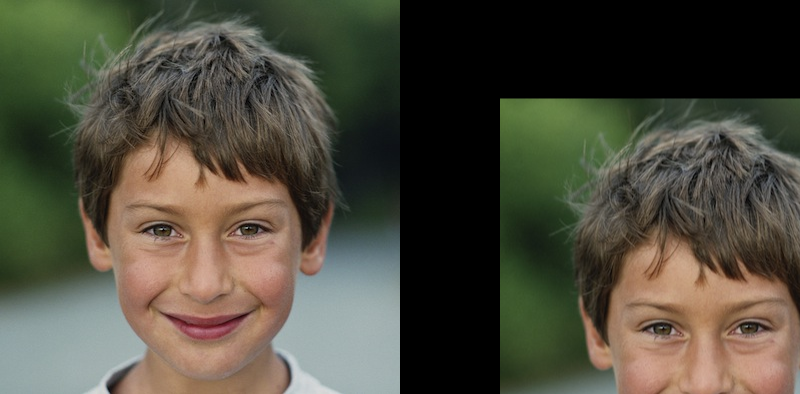

In [6]:
smile = cv2.imread('/content/drive/My Drive/images/boy_smiling.jpg')
height, width, channels = smile.shape
qh, qw = height/4, width/4
T = np.float32([[1,0,qw],[0,1,qh]])
smile_translate = cv2.warpAffine(smile, T, (width, height))
cv2_imshow(np.hstack([smile,smile_translate]))

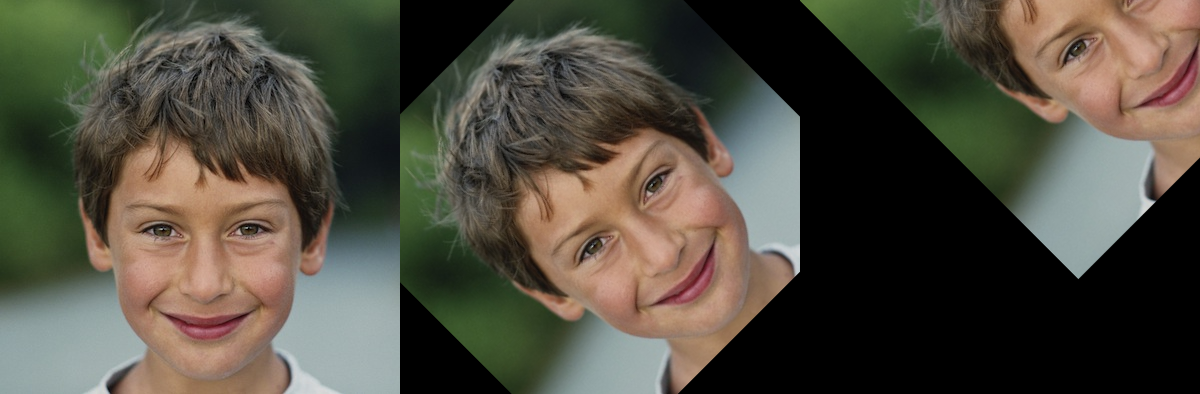

In [7]:
#rotation
smile = cv2.imread('/content/drive/My Drive/images/boy_smiling.jpg')
height, width, channels = smile.shape
M1 = cv2.getRotationMatrix2D((height/2, width/2), 45, 1)
M2 = cv2.getRotationMatrix2D((0, 0), 45, 1)
smile_rotate1 = cv2.warpAffine(smile, M1, (width, height))
smile_rotate2 = cv2.warpAffine(smile, M2, (width, height))
cv2_imshow(np.hstack([smile, smile_rotate1, smile_rotate2]))

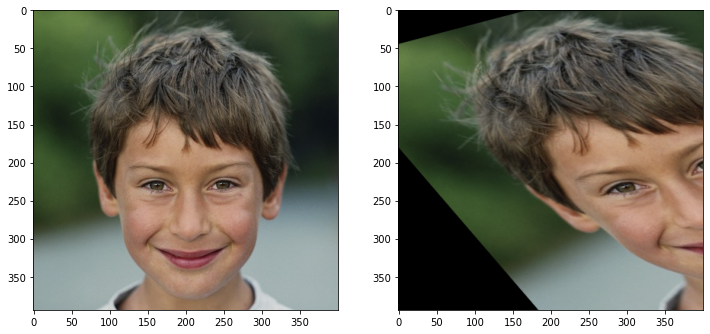

In [8]:
#Affine Transform
smile = cv2.imread('/content/drive/My Drive/images/boy_smiling.jpg')
smile = cv2.cvtColor(smile, cv2.COLOR_BGR2RGB)

pts1 = np.float32([[50, 50], [200, 50], [25, 200]])
pts2 = np.float32([[10, 100], [200, 50], [100, 250]])
transform_matrix = cv2.getAffineTransform(pts1, pts2)
smile_homography = cv2.warpAffine(smile, transform_matrix, (smile.shape[1], smile.shape[0]))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = [12, 12])
ax1.imshow(smile)
ax2.imshow(smile_homography)
fig.show()

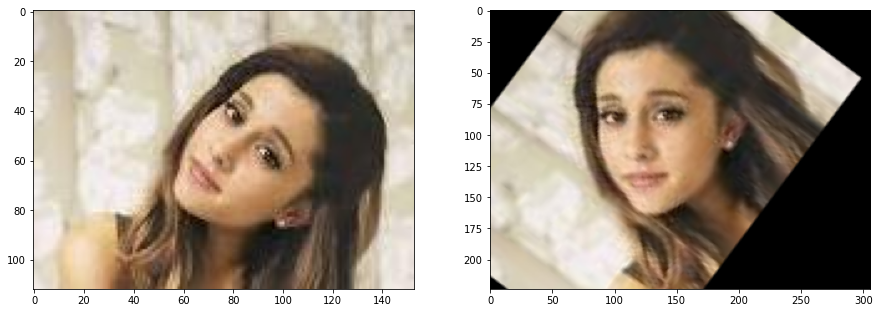

In [9]:
#ariana grange left eye (80, 40), right eye(95, 60)
ariana = cv2.imread('/content/drive/My Drive/images/tilted_face.jpg')
ariana = cv2.cvtColor(ariana,cv2.COLOR_BGR2RGB)

slope = (60 - 40) / (95 - 80)
angle = math.degrees(math.atan(slope))

height, width, channels = ariana.shape
M1 = cv2.getRotationMatrix2D((height/2 + 50, width/2 - 50), angle, 2)
ariana_rotated = cv2.warpAffine(ariana, M1, (width * 2, height * 2))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = [15, 15])
ax1.imshow(ariana)
ax2.imshow(ariana_rotated)
fig.show()

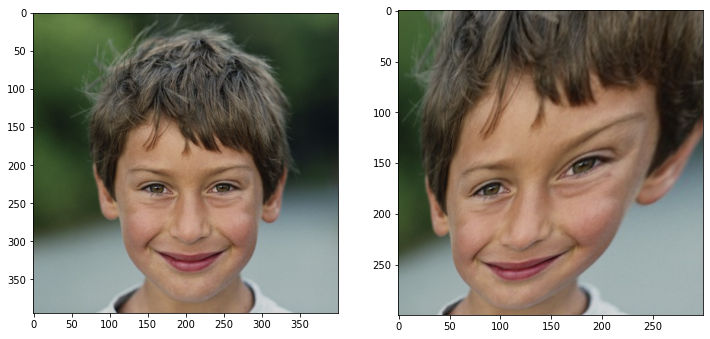

In [10]:
#Homography 
smile = cv2.imread('/content/drive/My Drive/images/boy_smiling.jpg')
smile = cv2.cvtColor(smile, cv2.COLOR_BGR2RGB)

pts1 = np.float32([[50, 50], [300, 150], [25, 387], [389, 390]])
pts2 = np.float32([[0, 0], [300, 0], [0, 300], [300, 300]])
transform_matrix = cv2.getPerspectiveTransform(pts1, pts2)
smile_homography = cv2.warpPerspective(smile, transform_matrix, (300, 300))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = [12, 12])
ax1.imshow(smile)
ax2.imshow(smile_homography)
fig.show()

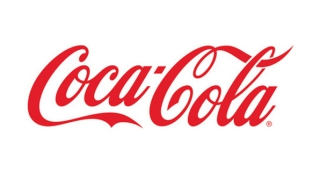

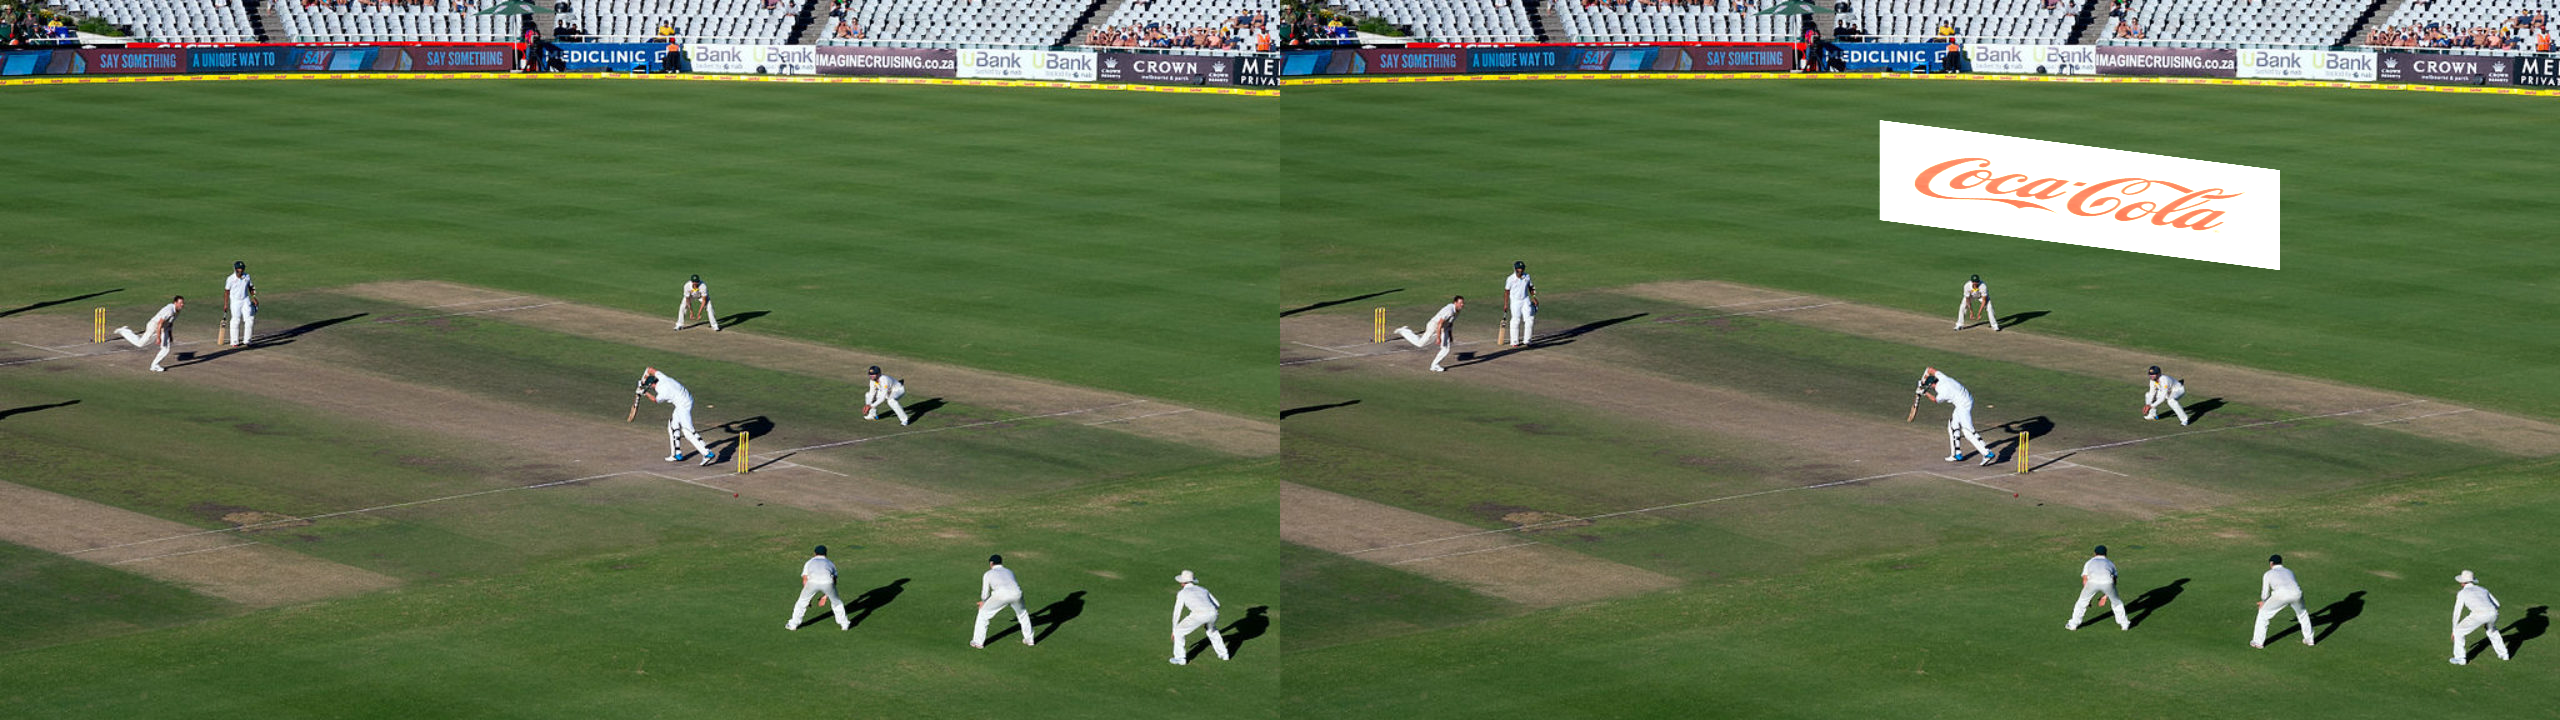

In [11]:
#Cricket example
pts1 = np.float32([[0,0],[0,179],[320, 0],[320,179]]) # cola coords 
pts2 = np.float32([[600,120],[600, 220],[1000, 170],[1000, 270]]) # stadium tile coord

cola = cv2.imread('/content/drive/My Drive/images/coca.jpg')
stadium = cv2.imread('/content/drive/My Drive/images/stadium.jpg')

transform_matrix, _ = cv2.findHomography(pts1, pts2)
cola_fit_tostad = cv2.warpPerspective(cola, transform_matrix, (stadium.shape[1], stadium.shape[0]))
fitted = cv2.add(stadium, cola_fit_tostad)

cv2_imshow(cola)
cv2_imshow(np.hstack([stadium, fitted]))
# cv2_imshow(fitted)